In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

dataset\sample_submission.csv
dataset\test.csv
dataset\train.csv


In [13]:
import tensorflow as tf
import keras

# Reading train and test data
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

# Class names
val_data = train_data.iloc[:5000,:]
train_data = train_data.iloc[5000:,:]

# Fetching the labels
train_labels = train_data.label
val_labels = val_data.label

# Reshaping training data
train_images = train_data.iloc[:,1:].values.reshape(37000, 28, 28)
# Reshaping validation data
val_images = val_data.iloc[:,1:].values.reshape(5000, 28, 28)

# Scaling data in the range of 0-1
train_images = train_images/255.0
val_images = val_images/255.0

# Defining multi-layer perceptron model with 3 hidden layer having 10 neurons each and with non-linearity
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Perform conversion of higher dimensional data (here, 2-D) to 1-D data.
    keras.layers.Dense(10, activation=tf.nn.leaky_relu), # Hidden layer with 10 neurons and ReLU activation function
    keras.layers.Dense(10, activation=tf.nn.leaky_relu), # Hidden layer with 10 neurons and ReLU activation function
    keras.layers.Dense(10, activation=tf.nn.leaky_relu), # Hidden layer with 10 neurons and ReLU activation function
    keras.layers.Dense(10, activation=tf.nn.leaky_relu), # Hidden layer with 10 neurons and ReLU activation function
    keras.layers.Dense(10, activation=tf.nn.softmax) # Output layer with softmax activation function 
])
# Defining parameters like optimizer, loss function and evaluating metric
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

test_images = test_data.iloc[:,:].values.reshape(28000, 28, 28)
test_images = test_images/255.0

output = model.predict(test_images)
results = np.argmax(output,axis = 1)
results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)

C:\Users\dangm\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5835 - loss: 1.2546 - val_accuracy: 0.8654 - val_loss: 0.4580
Epoch 2/20
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 0.8710 - loss: 0.4466 - val_accuracy: 0.8954 - val_loss: 0.3609
Epoch 3/20
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.8974 - loss: 0.3501 - val_accuracy: 0.9126 - val_loss: 0.3046
Epoch 4/20
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - accuracy: 0.9125 - loss: 0.3035 - val_accuracy: 0.9186 - val_loss: 0.2810
Epoch 5/20
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.9230 - loss: 0.2677 - val_accuracy: 0.9214 - val_loss: 0.2656
Epoch 6/20
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.9272 - loss: 0.2513 - val_accuracy: 0.9278 - val_loss: 0.2506
Epoch 7/20
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9276 - loss: 0.2408 - val_accuracy: 0.9234 - val_loss: 0.2539
Epoch 8/20
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9316 - loss:

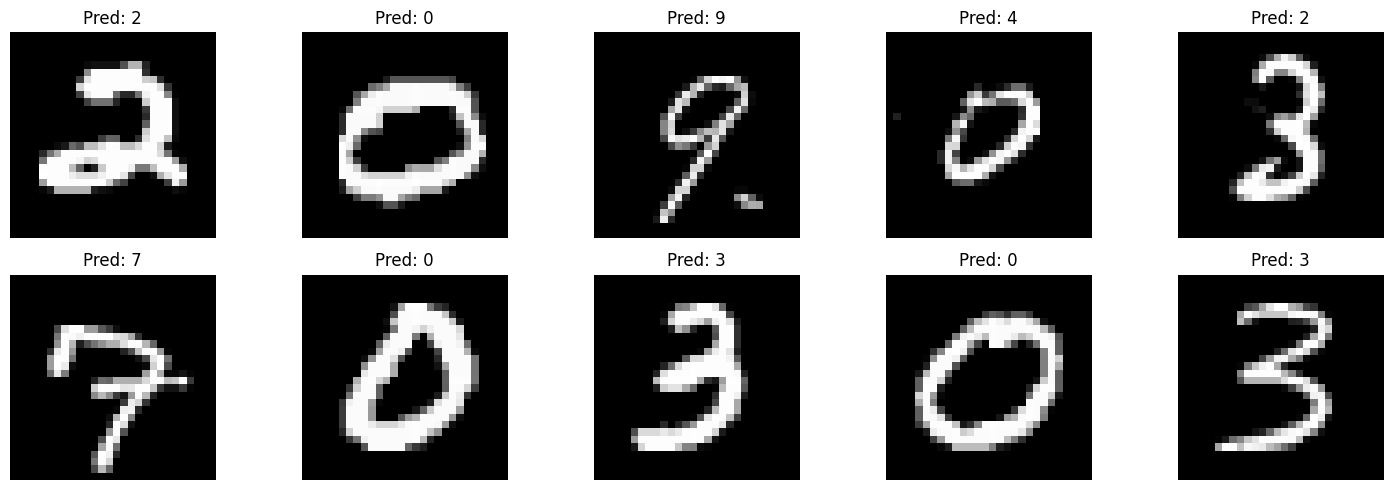

In [16]:
import matplotlib.pyplot as plt 

def visualize_predictions(images, predictions, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predictions[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualizing the first 10 test images with their predicted labels
visualize_predictions(test_images, results, num_images=10)